## Import libraries

In [1]:
# import necessary libraries
import os
import cv2
import pathlib
import argparse
import numpy as np
from imutils import paths
from preprocessing import *
from model import *
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import callbacks
from tensorflow.keras.models import load_model
tf.get_logger().setLevel('ERROR')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data_dir = r"E:\smile-detection\DataSetUpdated"
n_epochs = 10

img_width = 128
img_height = 128
gray = True

## Visualization

In [3]:
smile_paths = list(paths.list_images(os.path.join(data_dir, 'smile')))
non_smile_paths = list(paths.list_images(os.path.join(data_dir, 'non-smile')))

In [4]:
len(non_smile_paths)

578

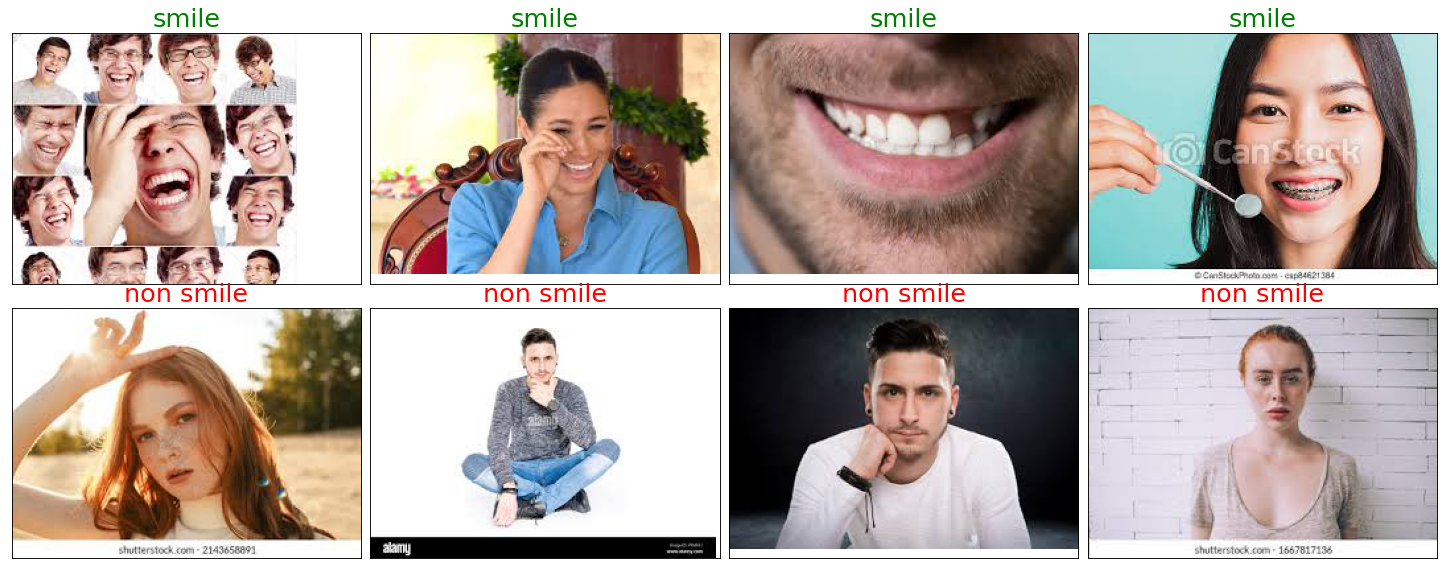

In [5]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 7),  dpi=80, sharex=True, sharey=True,
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < 4:
      ax.imshow(plt.imread(smile_paths[i]))
      ax.set_title("smile", fontsize = 23, color='green')
    else:
      ax.imshow(plt.imread(non_smile_paths[i]))
      ax.set_title("non smile", fontsize = 23, color='red')

plt.tight_layout(pad=0.5)
plt.show()

## Preprocessing

In [6]:
# get image paths and split into train and test
train_path, test_path = path_split(data_dir)

In [7]:
# Preprocessing and Labeling
train_X, train_y = data_extractor(train_path, img_height, img_width, gray)
test_X, test_y = data_extractor(test_path, img_height, img_width, gray)

## Build and compile the model

In [11]:
# if args.g is set to true, the images will be grayed out and the model will receive images with 1 channel
if gray == True:
    model = initialize_model(img_height, img_width, 1)
elif gray == False:
    model = initialize_model(img_height, img_width, 3)

In [12]:
# compile the model
model = compile_model(model) 

## plot the model

In [13]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Training

In [14]:
# Callbacks
Callbacks = [callbacks.EarlyStopping(monitor='val_accuracy', patience=4, verbose=0)]

In [15]:
model.fit(train_X, train_y, epochs=n_epochs, batch_size=32, validation_data=(test_X, test_y), callbacks=Callbacks)

Epoch 1/10
48/48 [==============================] - 124s 2s/step - loss: 0.6409 - accuracy: 0.6658 - val_loss: 0.6449 - val_accuracy: 0.6766
Epoch 2/10
48/48 [==============================] - 107s 2s/step - loss: 0.6369 - accuracy: 0.6770 - val_loss: 0.6139 - val_accuracy: 0.6766
Epoch 3/10
48/48 [==============================] - 110s 2s/step - loss: 0.6241 - accuracy: 0.6816 - val_loss: 0.6016 - val_accuracy: 0.7138
Epoch 4/10
48/48 [==============================] - 112s 2s/step - loss: 0.6206 - accuracy: 0.6875 - val_loss: 0.5976 - val_accuracy: 0.7100
Epoch 5/10
48/48 [==============================] - 110s 2s/step - loss: 0.6213 - accuracy: 0.6895 - val_loss: 0.5986 - val_accuracy: 0.7175
Epoch 6/10
48/48 [==============================] - 111s 2s/step - loss: 0.6193 - accuracy: 0.6934 - val_loss: 0.6069 - val_accuracy: 0.7212
Epoch 7/10
48/48 [==============================] - 114s 2s/step - loss: 0.6137 - accuracy: 0.6908 - val_loss: 0.5972 - val_accuracy: 0.7175
Epoch 8/10
48

## Save the model

In [16]:
# save the model
os.mkdir('MODEL_PATH')
model.save('MODEL_PATH/model.h5')

In [17]:
# Delete the model
del model

## Test

In [3]:
# Pre-processing for test images
def test_preprocessing(img_path, gray=True):
    image = cv2.imread(img_path)
    if gray:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (img_height, img_width), interpolation=cv2.INTER_AREA)
    image = image / 255.0
    return np.expand_dims(image, axis=0)

In [23]:
# test image path
test_img_path = 'jadi.jpg'

# read the test image
img = cv2.imread(test_img_path)

In [6]:
# Pre-processing
test_image = test_preprocessing(test_img_path, gray)

In [7]:
# load model
model = load_model('MODEL_PATH/model.h5')

In [8]:
# prediction
y_pred = model.predict(test_image, verbose=0)[0][0]

In [24]:
if y_pred > 0.5:
    cv2.putText(img, "Smile:  {:.0%}".format(y_pred), (400, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, color=(0,255,0), thickness=3)
    cv2.imshow("test image", img)
    cv2.waitKey(0)
    cv2.imwrite("test.jpg", img)

else:
    cv2.putText(img, "non Smile:  {:.0%}".format(1.0 - y_pred), (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, color=(0, 0, 255), thickness=5)
    cv2.imshow("test image", img)
    cv2.waitKey(0)
    cv2.imwrite("test.jpg", img)